In [1]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("dataset/train.csv")

In [3]:
names=list(df["name"].unique())
mapping_dic_name_class={}
mapping_dic_class_name={}
for name in names:
    df_name=df[df["name"]==name]
    classes=list(df_name["class"].unique())
    print(name,classes)
    mapping_dic_name_class[name]=classes[0]
    mapping_dic_class_name[classes[0]]=name

GARBAGE [3.0]
BAD_BILLBOARD [7.0]
SAND_ON_ROAD [8.0]
GRAFFITI [0.0]
POTHOLES [2.0]
CLUTTER_SIDEWALK [9.0]
CONSTRUCTION_ROAD [4.0]
BROKEN_SIGNAGE [5.0]
UNKEPT_FACADE [10.0]
FADED_SIGNAGE [1.0]
BAD_STREETLIGHT [6.0]


In [4]:
def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)),outline="black", width=4)
        
        plotted_image.text((x0, y0 - 10), mapping_dic_class_name[(float(obj_cls))],fill ="red",font=font)
    plt.figure(figsize=(12, 10), dpi=80)
    plt.imshow(np.array(image))
    plt.show()    
    
# class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))



# lets plot the square
font = ImageFont.truetype("FreeMono.ttf", 50)

[[3.0, 0.78, 0.438, 0.1, 0.094], [3.0, 0.895, 0.525, 0.152, 0.169], [3.0, 0.726, 0.467, 0.082, 0.085]]
dataset/train_images/4a48c42c9579ec0399e6c5a3e825e765.jpg
file is  dataset/train_images/4a48c42c9579ec0399e6c5a3e825e765.jpg


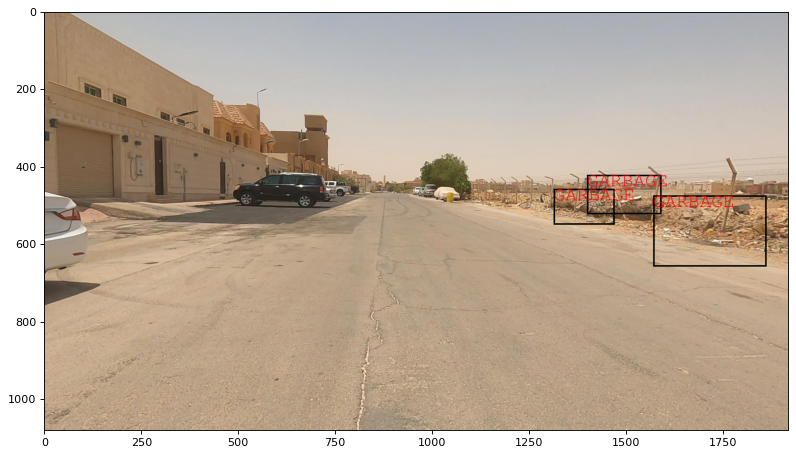

In [5]:
# Get any random annotation file 
# annotation_file = random.choice(annotations)

annotation_file = "dataset/annotations_all/4a48c42c9579ec0399e6c5a3e825e765.txt"
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]
    print(annotation_list)

#Get the corresponding image file
image_file = annotation_file.replace("annotations_all", "train_images").replace("txt", "jpg")
print(image_file)
print("file is ",image_file)
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

[[4.0, 0.406, 0.369, 0.172, 0.198], [4.0, 0.533, 0.346, 0.09, 0.096]]
file is  dataset/train_images/0a7bda3ef30b632b39a18a2c34bcc872.jpg


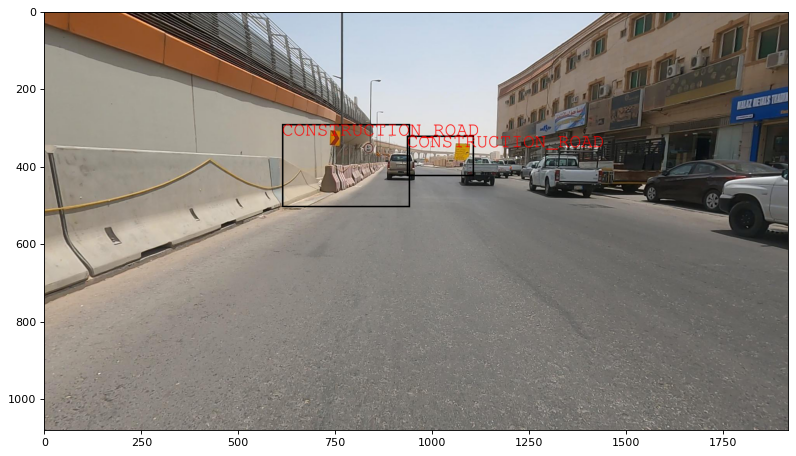

In [6]:
# Get any random annotation file 
# annotation_file = random.choice(annotations)

annotation_file = "dataset/annotations_all/0a7bda3ef30b632b39a18a2c34bcc872.txt"
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]
    print(annotation_list)

#Get the corresponding image file
image_file = annotation_file.replace("annotations_all", "train_images").replace("txt", "jpg")
print("file is ",image_file)
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

[[2.0, 0.507, 0.749, 0.15, 0.487]]
file is  dataset/train_images/0a72289b0b455d083ed606f24504d74c.jpg


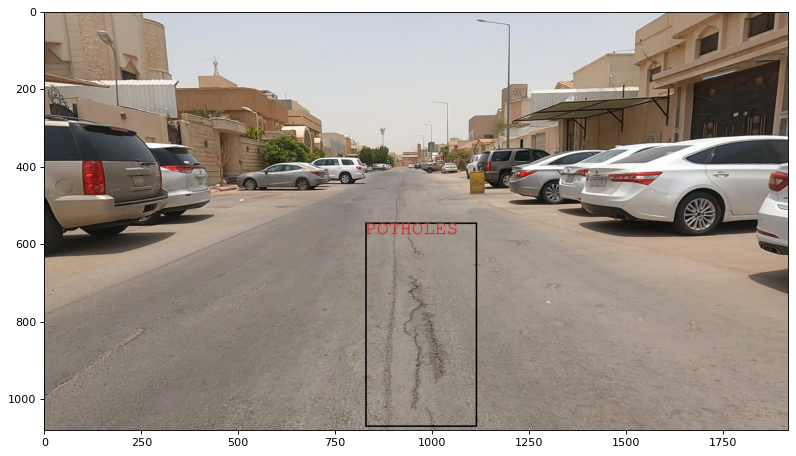

In [7]:
# Get any random annotation file 
# annotation_file = random.choice(annotations)

annotation_file = "dataset/annotations_all/0a72289b0b455d083ed606f24504d74c.txt"
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]
    print(annotation_list)

#Get the corresponding image file
image_file = annotation_file.replace("annotations_all", "train_images").replace("txt", "jpg")
print("file is ",image_file)
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)